# __Stochastic Gradient Descent (SGD)__
- Stochastic Gradient Descent (SGD) is an optimization algorithm, commonly used in machine learning to train models. It is easier to fit into memory due to a single training sample being processed by the network.
- It is computationally fast as only one sample is processed at a time. For larger datasets, it can converge faster as it causes updates to the parameters more frequently.

## Steps to Be Followed:
1. Importing the required library
2. Loading the dataset
3. Preparing the data
4. Filtering the DataFrames
5. Initializing the scale variable
6. Implementing the SGD algorithm
7. Plotting the graph

  ### Step 1: Importing the Required Libraries

  - It imports the necessary libraries and modules for data analysis and evaluation tasks.

  - It specifically imports NumPy (for numerical operations), Pandas (for data manipulation), Matplotlib (for data visualization), and scikit-learn (for machine learning tasks) modules and functions.
  - The **fetch_california_housing** function is used to load the California housing dataset, and **mean_squared_error** is a metric function used to evaluate the performance of a regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

### Step 2: Loading the Dataset
- The **housing_data = fetch_california_housing()** loads the California housing dataset into the **housing_data** variable. This dataset contains information about housing prices and various features related to housing in different regions of California.

In [2]:
housing_data = fetch_california_housing()


### Step 3: Preparing the Data

- Create a DataFrame **Features** to store the feature data from the Boston Housing dataset.
- Creates another DataFrame **Target** to store the target variable values
- Use the **join()** method to combine the feature and target DataFrames
- Use the **head()** function is used to display the first 5 rows of the DataFrame df

In [3]:

Features = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns = ["Target"])

In [5]:
df = Features.join(Target)

In [6]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Observation**

- The output represents a DataFrame with several columns:

  - **MedInc**: Median income in the block.
  - **HouseAge**: Median house age in the block.
  - **AveRooms**: Average number of rooms per dwelling.
  - **AveBedrms**: Average number of bedrooms per dwelling.
  - **Population**: Block population.
  - **AveOccup**: Average number of occupants per dwelling.
  - **Latitude**: Latitude of the block's location.
  - **Longitude**: Longitude of the block's location.
  - **Target**: Target variable, representing the median house value for the block.
- Each row in the DataFrame corresponds to a specific block or housing unit, and the columns represent different features and the target variable associated with each block.

### Step 4: Filtering the DataFrames

- It filters the DataFrame df based on two conditions:

  - **df[df.Target < 3.5]**: This line filters the DataFrame to include only rows where the value in the "Target" column is less than 3.5. It creates a new DataFrame with only those rows that meet this condition.

  - **df[df.MedInc < 8]**: This line further filters the previously filtered DataFrame to include only rows where the value in the "MedInc" column is less than 8. It creates another new DataFrame with rows that meet both conditions (Target < 3.5 and MedInc < 8).

In [7]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]



- It computes the descriptive statistics of the **MedInc** and **Target** columns in the DataFrame df and returns the statistics excluding the count.

In [8]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


**Observation**
- The given step computes and displays the descriptive statistics, such as mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maximum, for the 'MedInc' and 'Target' columns of the DataFrame df.

### Step 5: Initializing the Scale Variable

- The function **scale(x)** is defined to perform feature scaling on a given input **x**, using min-max normalization.
- The **min** and **max** variables are calculated as the minimum and maximum values of **x**, respectively.
- The function returns a Pandas Series object with scaled values, obtained by subtracting the minimum value from each element of **x** and dividing it by the range (difference between the maximum and minimum values) of **x**.

In [9]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

### Step 6: Implementing the SGD Algorithm
- The given step implements the SGD algorithm for a single feature, **MedInc**, and its corresponding target variable, **Target**.
- The algorithm starts with initial parameter values of m = 0.5 and b = 0.5.
- It iteratively updates the parameters using random samples of **batch_size** from the dataset, calculates the mean squared error, and stores the learning process in terms of the updated parameters and MSE values.

In [10]:
X = df.MedInc
y = df.Target


def SGD(X, y, lr=0.05, epoch=10, batch_size=1):

    '''
    Stochastic Gradient Descent for a single feature
    '''

    m, b = 0.5, 0.5
    log, mse = [], []

    for _ in range(epoch):

        indexes = np.random.randint(0, len(X), batch_size)

        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)

        f = ys - (m*Xs + b)


        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)

        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))

    return m, b, log, mse




  - It performs SGD optimization to train a model on the input features **X** and target variable **y**, and returns the trained model parameters **m** and **b**, the training loss history **log**, and the mean squared error (**mse**).

In [11]:
m, b, log, mse = SGD(X,y, lr = 0.01, epoch = 10, batch_size = 2)


- It calculates the predicted values **y_pred** using the model parameters **m**, **b**, and the input features **X**, computes the MSE between the predicted values **y_pred** and the actual target values **y**, and prints the MSE.

In [12]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))


MSE: 0.34374705524970495


**Observation**
- The mean squared error between the predicted values **y_pred** and the actual target values **y** is calculated and printed.
- The mean squared error is 0.34369.

 Note: It is ideal to use the standard implementation of SGD as it is optimized for speed and accuracy.


### Step 7: Plotting the Graph
- Plotting the original data points in blue, representing the relationship between the feature **MedInc** and the **target** variable.
- Adding the fitted regression line in red to represent the predicted values against the **MedInc** feature.
- Labeling the x and y axes, adding a legend to distinguish between the original data and the fitted line, and finally displaying the plot.

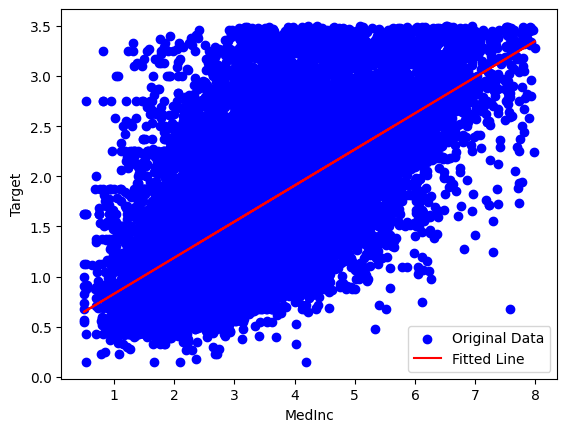

In [13]:

plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.legend()
plt.show()

**Observation:**
- The visual representation includes both the original data points and the fitted regression line, illustrating the relationship between the **MedInc** feature and the **target** variable.